# NETFLIX DATA ANALYSIS

 To analyze the distribution of Netflix content by type (e.g., movie or TV show), release year, and country to identify trends and popular genres with the available netflix dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading the dataset
dataset=pd.read_csv('netflix_titles.csv')

In [3]:
dataset

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
dataset.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [6]:
dataset['show_id'].value_counts()

s1       1
s5875    1
s5869    1
s5870    1
s5871    1
        ..
s2931    1
s2930    1
s2929    1
s2928    1
s8807    1
Name: show_id, Length: 8807, dtype: int64

In [7]:
dataset['type'].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

Text(0.5, 0.98, 'Visualizing the type data')

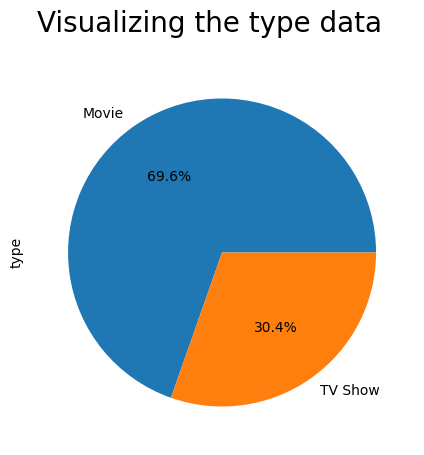

In [8]:
dataset['type'].value_counts().plot(kind='pie',autopct='%1.1f%%',figsize=(10,5))
plt.suptitle('Visualizing the type data',fontsize=20)

In [9]:
dataset['title'].value_counts()

Dick Johnson Is Dead                     1
Ip Man 2                                 1
Hannibal Buress: Comedy Camisado         1
Turbo FAST                               1
Masha's Tales                            1
                                        ..
Love for Sale 2                          1
ROAD TO ROMA                             1
Good Time                                1
Captain Underpants Epic Choice-o-Rama    1
Zubaan                                   1
Name: title, Length: 8807, dtype: int64

In [10]:
dataset['director']=dataset['director'].fillna('New')

In [11]:
dataset['director'].value_counts()

New                               2634
Rajiv Chilaka                       19
Raúl Campos, Jan Suter              18
Suhas Kadav                         16
Marcus Raboy                        16
                                  ... 
Raymie Muzquiz, Stu Livingston       1
Joe Menendez                         1
Eric Bross                           1
Will Eisenberg                       1
Mozez Singh                          1
Name: director, Length: 4529, dtype: int64

In [12]:
dataset['cast']=dataset['cast'].fillna('New-cast')

In [13]:
dataset['cast'].value_counts()

New-cast                                                                                                                                                                                      825
David Attenborough                                                                                                                                                                             19
Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Mousam, Swapnil                                                                                                        14
Samuel West                                                                                                                                                                                    10
Jeff Dunham                                                                                                                                                                                     7
                              

In [14]:
dataset['country']=dataset['country'].fillna('India')

In [15]:
dataset['country'].value_counts()

United States                             2818
India                                     1803
United Kingdom                             419
Japan                                      245
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: country, Length: 748, dtype: int64

In [16]:
dataset['date_added'].value_counts()

January 1, 2020      109
November 1, 2019      89
March 1, 2018         75
December 31, 2019     74
October 1, 2018       71
                    ... 
December 4, 2016       1
November 21, 2016      1
November 19, 2016      1
November 17, 2016      1
January 11, 2020       1
Name: date_added, Length: 1767, dtype: int64

In [17]:
# Clean the date strings by stripping whitespace
dataset['date_added'] = dataset['date_added'].str.strip()

# Define a date to fill missing values (for demonstration, using 'January 1, 1900')
fill_date = pd.to_datetime('January 1, 1900')

# Fill missing values with the defined date
dataset['date_added'].fillna(fill_date.strftime('%B %d, %Y'), inplace=True)

# Convert the 'date_added' column to datetime format
dataset['date_added'] = pd.to_datetime(dataset['date_added'], format='%B %d, %Y', errors='coerce')

In [18]:
dataset['date_added'].isnull().sum()

0

In [19]:
dataset['Year Added'] = dataset['date_added'].dt.year
dataset['Month Added'] = dataset['date_added'].dt.month
dataset['Day Added'] = dataset['date_added'].dt.day
dataset['Weekday Added'] = dataset['date_added'].dt.weekday  # 0 = Monday, 6 = Sunday

<Axes: >

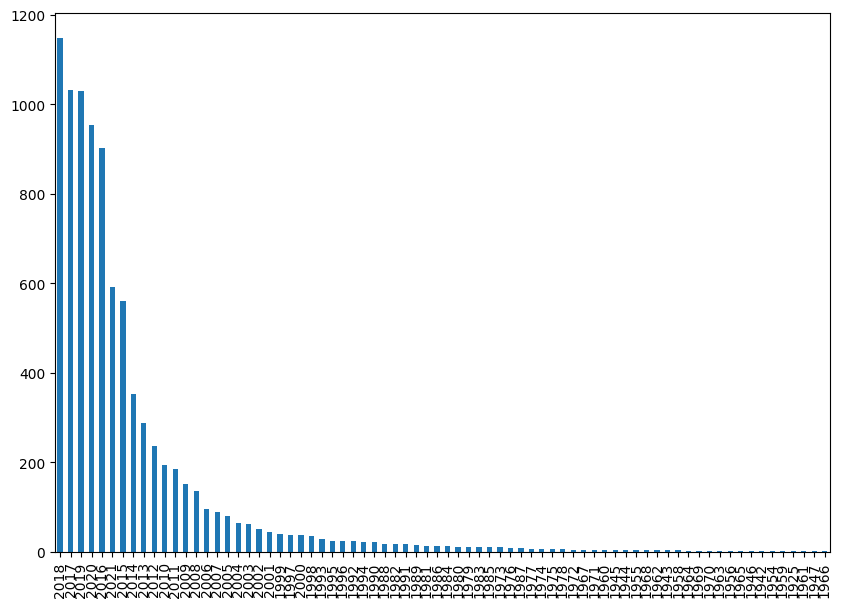

In [20]:
dataset['release_year'].value_counts().plot(kind='bar',figsize=(10,7))

In [21]:
dataset['rating']=dataset['rating'].fillna('TV-MA')

In [22]:
dataset['rating'].value_counts()

TV-MA       3211
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

Text(0.5, 0.98, 'Rating data in the dataset')

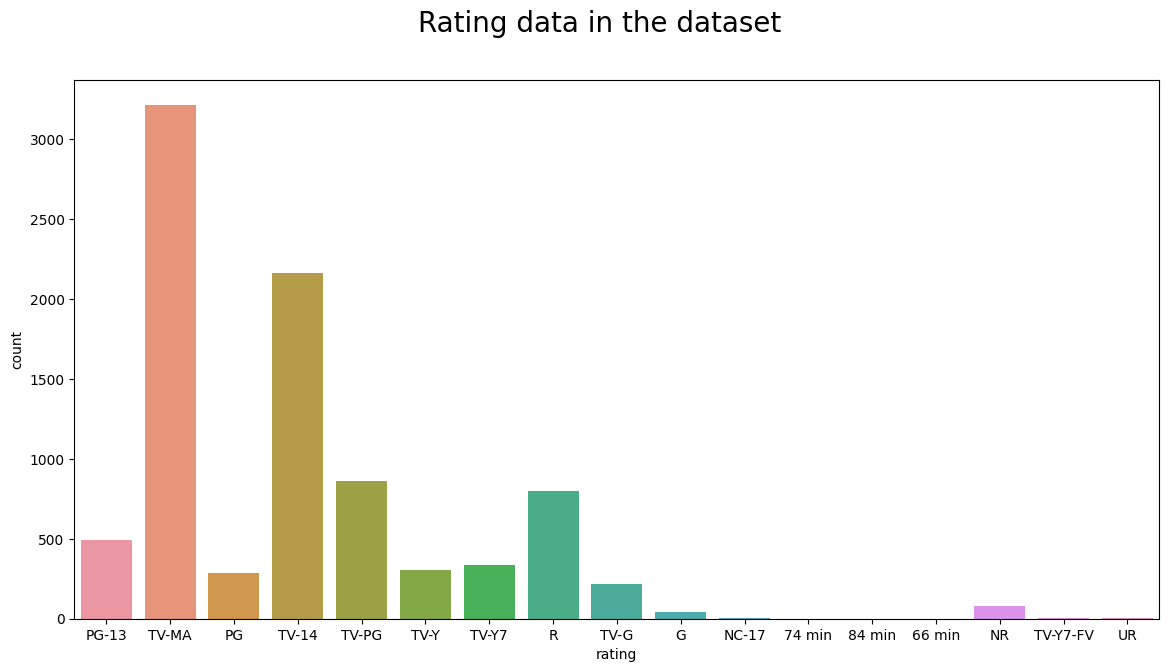

In [23]:
plt.figure(figsize=(14,7))
sns.countplot(data=dataset,x='rating')
plt.suptitle('Rating data in the dataset',fontsize=20)

In [24]:
dataset['duration']=dataset['duration'].fillna('1 Season')

In [25]:
def convert_to_minutes(duration):
    try:
        if isinstance(duration, str):
            if 'seasons' in duration.lower():
                # Assuming 1 season is approximately 600 minutes (10 hours)
                seasons = int(duration.split()[0])
                return seasons * 600
            elif 'min' in duration.lower():
                return int(duration.split()[0])
            elif 'h' in duration.lower():
                h, m = duration.split('h')
                if 'min' in m:
                    return int(h.strip()) * 60 + int(m.strip().replace('min', ''))
                else:
                    return int(h.strip()) * 60
        elif pd.notnull(duration):
            # If it's already a number, assume it's in minutes
            return int(duration)
    except ValueError:
        pass
    return np.nan

dataset['duration'] = dataset['duration'].apply(convert_to_minutes)

In [26]:
dataset['duration'].value_counts()

1200.0    425
1800.0    199
90.0      152
94.0      146
97.0      146
         ... 
16.0        1
186.0       1
193.0       1
189.0       1
191.0       1
Name: duration, Length: 219, dtype: int64

In [27]:
dataset['duration'].isnull().sum()

1796

In [28]:
dataset['duration']=dataset['duration'].fillna(dataset['duration'].mean())

In [29]:
dataset['duration'].isnull().sum()

0

In [30]:
dataset['listed_in'].value_counts()

Dramas, International Movies                          362
Documentaries                                         359
Stand-Up Comedy                                       334
Comedies, Dramas, International Movies                274
Dramas, Independent Movies, International Movies      252
                                                     ... 
Kids' TV, TV Action & Adventure, TV Dramas              1
TV Comedies, TV Dramas, TV Horror                       1
Children & Family Movies, Comedies, LGBTQ Movies        1
Kids' TV, Spanish-Language TV Shows, Teen TV Shows      1
Cult Movies, Dramas, Thrillers                          1
Name: listed_in, Length: 514, dtype: int64

Text(0.5, 0.98, 'Listed In data')

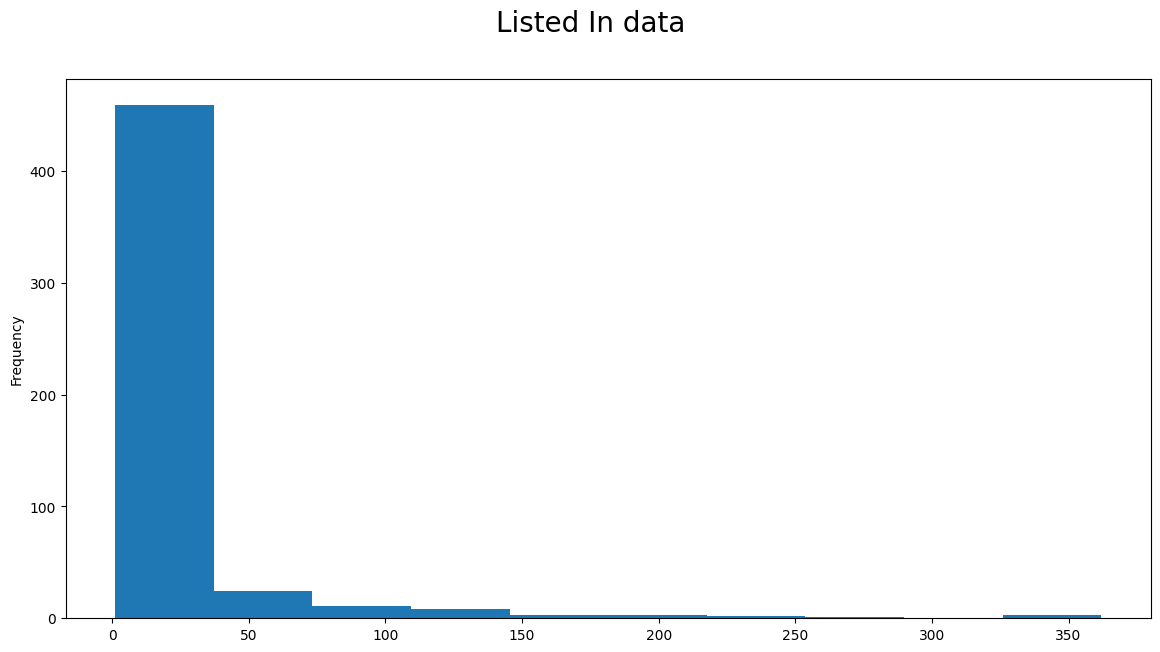

In [31]:
dataset['listed_in'].value_counts().plot(kind='hist',figsize=(14,7))
plt.suptitle('Listed In data',fontsize=20)

In [32]:
dataset['description'].value_counts()

Paranormal activity at a lush, abandoned property alarms a group eager to redevelop the site, but the eerie events may not be as unearthly as they think.    4
Challenged to compose 100 songs before he can marry the girl he loves, a tortured but passionate singer-songwriter embarks on a poignant musical journey.    3
A surly septuagenarian gets another chance at her 20s after having her photo snapped at a studio that magically takes 50 years off her life.                 3
Multiple women report their husbands as missing but when it appears they are looking for the same man, a police officer traces their cryptic connection.     3
Secrets bubble to the surface after a sensual encounter and an unforeseen crime entangle two friends and a woman caught between them.                        2
                                                                                                                                                            ..
Sent away to evade an arranged marriage, a 14-

Text(0.5, 0.98, 'Release_year type wise')

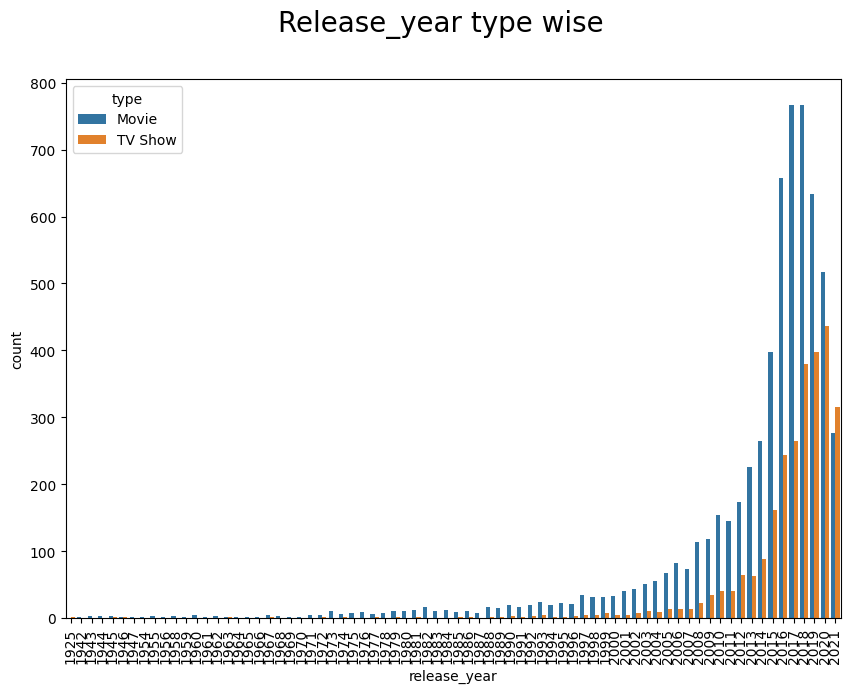

In [33]:
plt.figure(figsize=(10,7))
sns.countplot(data=dataset,x='release_year',hue='type')
plt.xticks(rotation=90)
plt.suptitle('Release_year type wise',fontsize=20)

Text(0.5, 0.98, 'Distribution of Ratings')

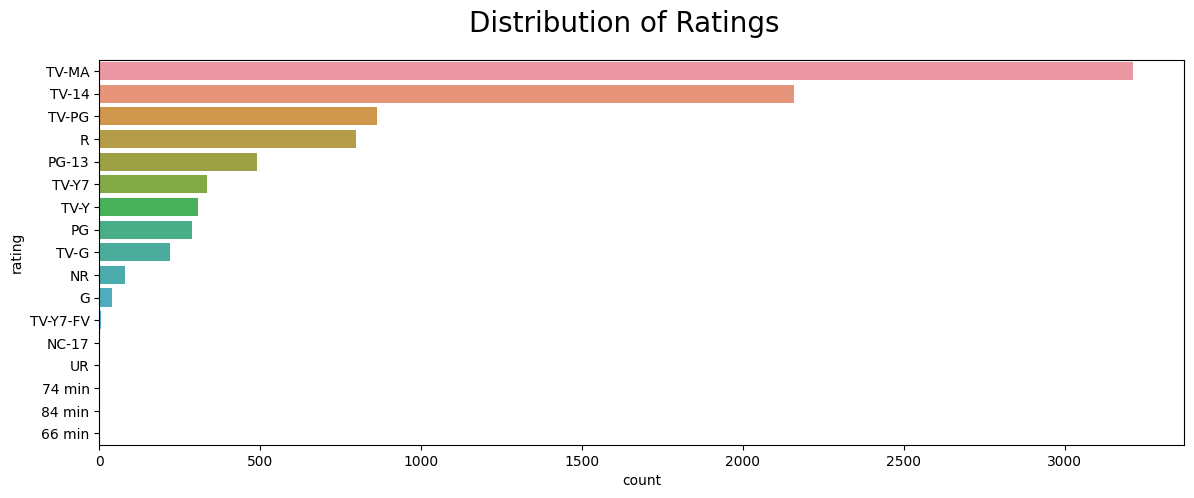

In [34]:
plt.figure(figsize=(14,5))
sns.countplot(data=dataset, y='rating', order=dataset['rating'].value_counts().index)
plt.suptitle('Distribution of Ratings',fontsize=20)

Text(0.5, 0.98, 'Top 10 Countries by Number of Shows')

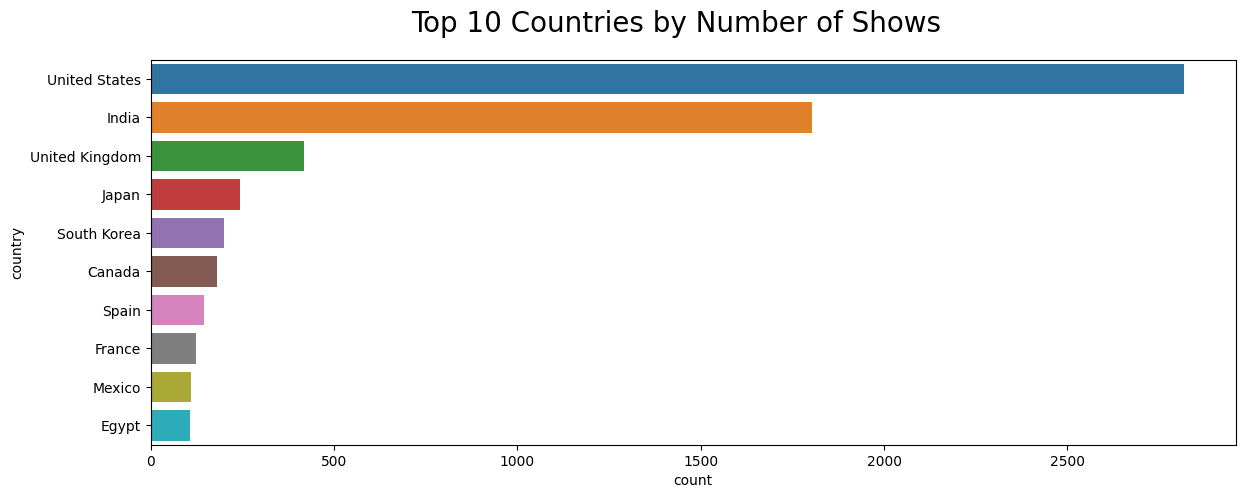

In [35]:
plt.figure(figsize=(14,5))
sns.countplot(data=dataset, y='country', order=dataset['country'].value_counts().head(10).index)
plt.suptitle('Top 10 Countries by Number of Shows',fontsize=20)

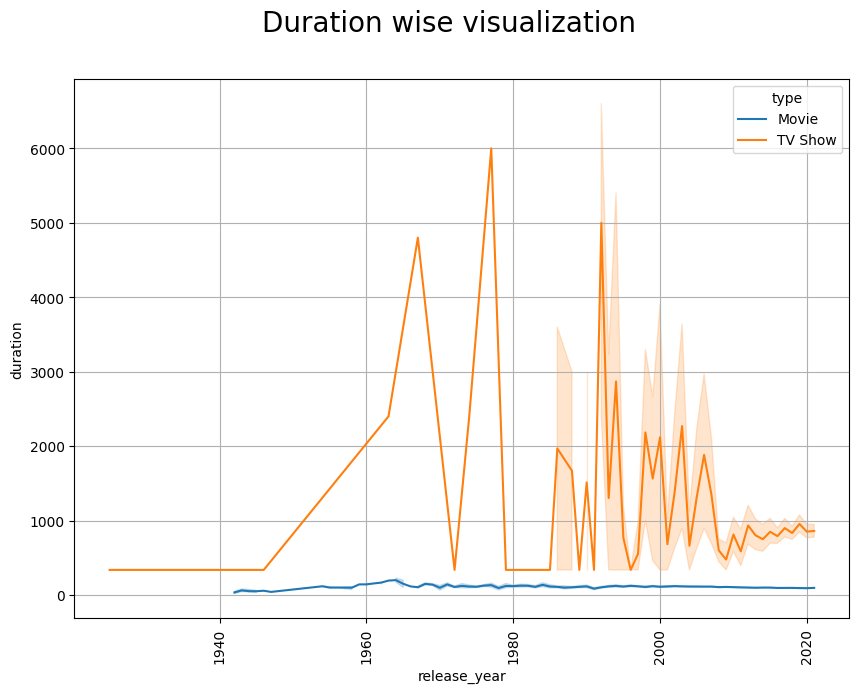

In [36]:
plt.figure(figsize=(10,7))
sns.lineplot(data=dataset,x='release_year',y='duration',hue='type')
plt.xticks(rotation=90)
plt.suptitle('Duration wise visualization',fontsize=20)
plt.grid()

In [37]:
type_of_film=dataset.groupby('release_year')['show_id'].count().reset_index()
type_of_film

,release_year,show_id
0,1925,1
1,1942,2
2,1943,3
3,1944,3
4,1945,4
...,...,...
69,2017,1032
70,2018,1147
71,2019,1030
72,2020,953


Text(0.5, 0.98, 'Type of film released years')

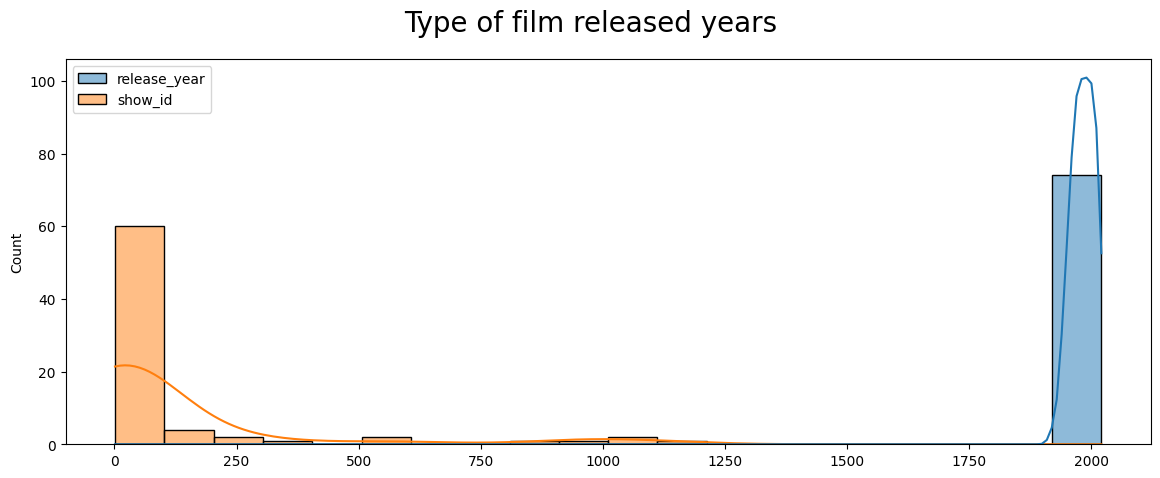

In [38]:
plt.figure(figsize=(14,5))
sns.histplot(data=type_of_film,bins=20,kde=True)
plt.suptitle('Type of film released years',fontsize=20)

In [39]:
duration_of_film=dataset.groupby('type')['duration'].mean().sort_values(ascending=True)
duration_of_film

type
Movie       99.693746
TV Show    883.276565
Name: duration, dtype: float64

Text(0.5, 0.98, 'Average Running time of shows.')

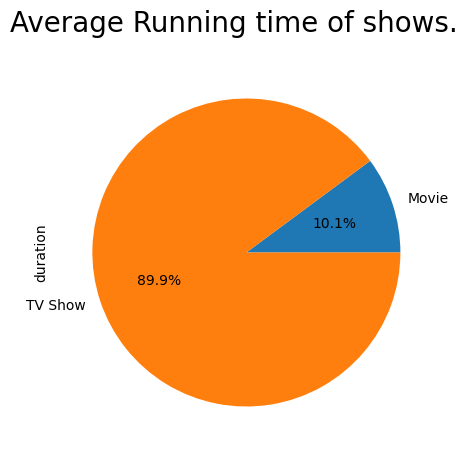

In [40]:
duration_of_film.plot(kind='pie',autopct='%1.1f%%',figsize=(10,5))
plt.suptitle('Average Running time of shows.',fontsize=20)

C:\Users\Admin\AppData\Local\Temp\ipykernel_7964\499102045.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(),annot=True,cmap='coolwarm')


Text(0.5, 0.98, 'Correlating the dataset')

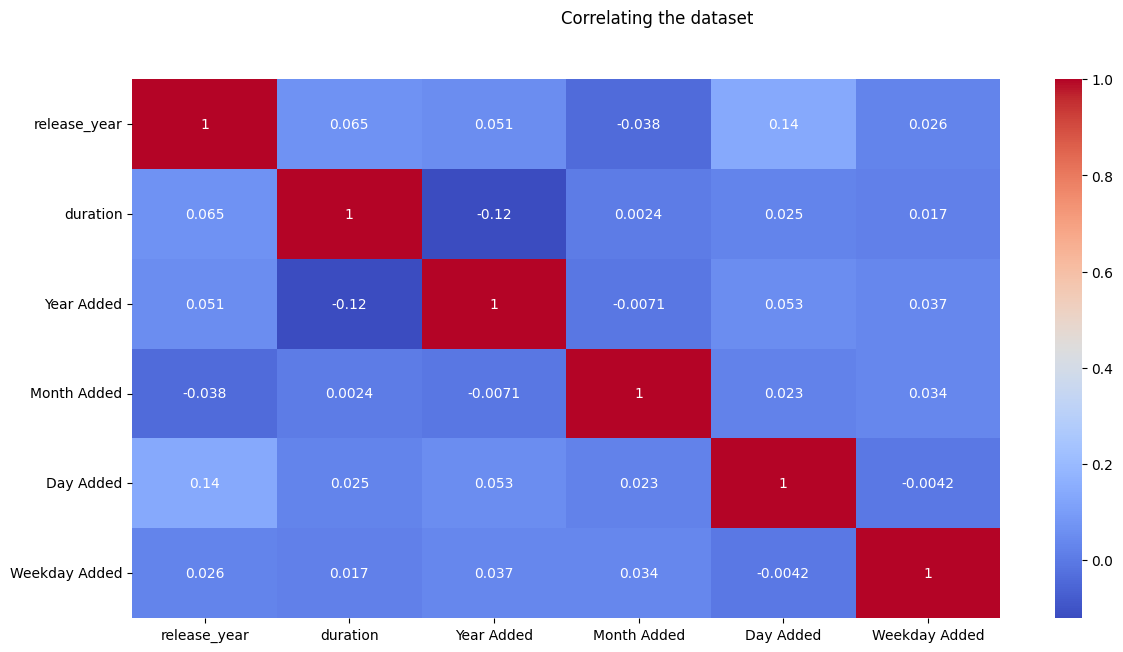

In [41]:
plt.figure(figsize=(14,7))
sns.heatmap(dataset.corr(),annot=True,cmap='coolwarm')
plt.suptitle('Correlating the dataset')